In [1]:
import h5py
import numpy
import matplotlib.pyplot as plt
from main import *

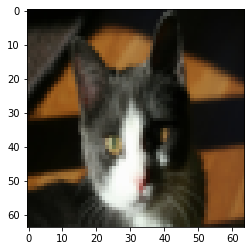

In [6]:
# load the data
train_x, train_y, test_x, test_y, classes = load_cat_data()

# plot example image at index
plt.imshow(train_x[19]);

In [20]:
train_num = train_x.shape[0]
pixel_num = train_x.shape[1]
test_num = test_x.shape[0]

print("Number of training datapoints: " + str(train_num))
print("Number of test datapoints:     " + str(test_num)+ "\n")
print("Images are of size: (" + str(pixel_num) + ", " + str(pixel_num) + ", 3)" + "\n")
print("Shape of train_x: " + str(train_x.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_x:  " + str(test_x.shape))
print("Shape of test_y:  " + str(test_y.shape))

Number of training datapoints: 209
Number of test datapoints:     50

Images are of size: (64, 64, 3)

Shape of train_x: (209, 64, 64, 3)
Shape of train_y: (1, 209)
Shape of test_x:  (50, 64, 64, 3)
Shape of test_y:  (1, 50)


Reshaping process turns the dimensions of the data to the following:

In [27]:
# reshape the training and test examples 
train_x_flat = train_x.reshape(train_x.shape[0], -1).T 
test_x_flat = test_x.reshape(test_x.shape[0], -1).T

# standardize data to values between 0 and 1
train_x = train_x_flat/train_x_flat.max()
test_x = test_x_flat/train_x_flat.max()

print ("Shape of train_x: " + str(train_x.shape))
print ("Shape of test_x:  " + str(test_x.shape))

Shape of train_x: (209, 12288)
Shape of test_x:  (50, 12288)


In [29]:
def initialize_params(layer_dims):

    params = {}
    L = len(layer_dims)  # amount of layer in the neural net

    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        params['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

In [ ]:
    """
    Arguments:
    layer_dims -- python array with the dimensions of each layer in our network
    
    Returns:
    params -- python dictionary with parameters from W1 & b1 to WL & bL as keys containing:
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

In [46]:
d = initialize_parameters_deep([4,3,1])
print(train_x.shape)
print(d['W1'])
print('\n')
print(d['W1'].shape)
print(d['b1'].shape)
print(d['W2'].shape)
print(d['b2'].shape)

(209, 12288)
[[ 0.81217268 -0.30587821 -0.26408588 -0.53648431]
 [ 0.43270381 -1.15076935  0.87240588 -0.38060345]
 [ 0.15951955 -0.12468519  0.73105397 -1.03007035]]


(3, 4)
(3, 1)
(1, 3)
(1, 1)


In [164]:
np.random.seed = 3

np.random.randn(3, 2)*0.01

array([[3.22129514e-03, 9.46152395e-03],
       [8.93910237e-05, 8.22730005e-03],
       [8.61211638e-03, 4.39830814e-03]])